1879.0096950265277


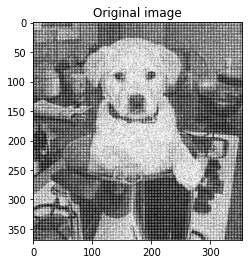

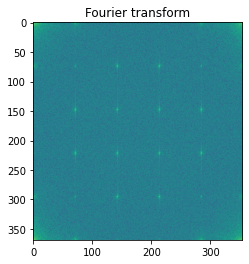

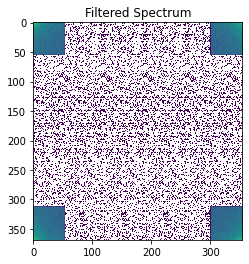

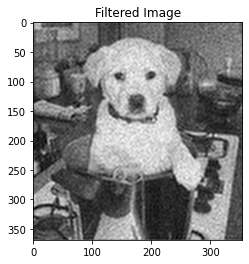

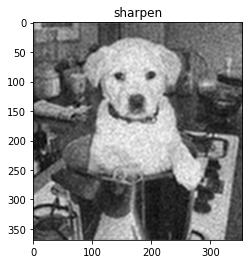

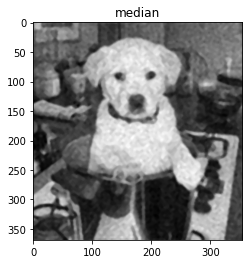

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import cv2

# Import disorted image and save as im. The og variable is the same as im, but will be used later for MSE calculation later.
im = plt.imread('dogDistorted.bmp')
org = plt.imread('dogOriginal.bmp')
og = org[:, :, 0]

# Display image in gray.
plt.figure()
plt.imshow(im, plt.cm.gray)
plt.title('Original image')

# Use fast fourier transform to convert the image into an array of its sine and cosine frequency values from low to high.
from scipy import fftpack
im_fft = fftpack.fft2(im)

# Import LogNorm to normalize value inbetween vmin and vmax to 0-1 on the log scale
# If vmin and vmax are not provided, autoscale_None(value) is called on the first use which will initialize the values.
from matplotlib.colors import LogNorm

# np.abs provides the absolute value of each value in the array im_fft, we must use LogNorm to plot the transformation to a graph.
plt.figure()
plt.imshow(np.abs(im_fft), norm=LogNorm())
plt.title('Fourier transform')
# We can see the concentration of light at the corners and the noise shaped like a grid throughout the image.

# Define the amount we keep at the edge of the image as a percentage.
keep = 0.15

# Use .shape to get the dimensions and values of the 2D array im_fft, u v for frequency index.
u, v = im_fft.shape


# Slice out section of array between (u size of array x 0.15 gives 15%) and
# u times (1 - 0.15) = 75% of the image and set these values to 0 
# cast as an integer as it cannot slice floating point.
im_fft[int(u*keep):int(u*(1-keep))] = 0

# We do the same for v except we include a colon to look through 
# all dimensions (u) and slice the values in each of these dimensions.
im_fft[:,int(v*keep):int(v*(1-keep))] = 0

# Display the transform after removing the noise frequencies.
plt.figure()
plt.imshow(np.abs(im_fft), norm=LogNorm())
plt.title('Filtered Spectrum')

# Get the inverse of the fourier transformation.
im_new = fftpack.ifft2(im_fft).real

# Dislay filtered image.
plt.figure()
plt.imshow(im_new, plt.cm.gray)
plt.title('Filtered Image')

# Perform a GaussianBlur on the image to further remove any noise.
blur = cv2.GaussianBlur(im_new,(5,5),cv2.BORDER_DEFAULT) 
# We use the sharpening kernel.
kernel = np.array([[0,-1,0], [-1,5,-1], [0,-1,0]])
# filter2D takes a kernel and calculates the average of each pixel in a blurred image to enhance detail.
im = cv2.filter2D(blur, -1, kernel)

# Display sharpened image.
plt.figure()
plt.imshow(im, plt.cm.gray)
plt.title('sharpen')

# Save our sharpened image as an array called noise_img of type uint8 for correct format for medianBlur.
noise_img = np.array(im, dtype = 'uint8')

# Here median blur takes the input image noise_img and calculates the median of each pixel inside the kernel of a specified size, here 5.
median = cv2.medianBlur(noise_img, 5)

plt.figure()
plt.imshow(median, plt.cm.gray)
plt.title('median')
# Final image

# First convert the uint8 images to floating point to avoid it wrapping around after reaching 255
# take the original values from the filtered image and square the result
# get the mean, sum of the array values divided by the number of elements
Dif = (np.subtract(og.astype('float'), median.astype('float'))) ** 2
mse = squared_array.mean()
print(mse)